# Session 24

## Linear Regression and correlation.

> y = mx + c will be written as y = beta_0 + beta_1(x)

## RMSE- Root Mean Squared Error

#### Used when the individual errors are bigger but the average error is 0

> Finding the error

> Square the error

> Find the mean

> Apply Square root on the mean


#### The Model whose RMSE will be smaller will be the best model

### New Equation with the RMSE

> y = beta_0 + beta_1(x) + Eplison

### The Line of our interest is:

> Sunday = beta_0 + beta_1 Daily + Epsilon

> or 

> Y = beta_0 + beta_1 X + Epsilon

> beta_1_cap = (E(yi - y_bar)(xi - x_bar)) / (E(xi - x_bar)^2)


> beta_0_cap = y_bar = beta_1_cap(x_bar)

#### Where E is the summation

#### Coefficient of Determination R^2

> Proportion of variation in Y "Explained" by the regression on X

>> r^2 = explained variation/total variation = SSR/SST

> Range of r^2    0 <= r^2 <= 1

> better only if r^2 > .8

## Linear regression in python

# Import Data Set

In [13]:
import pandas as pd
data = pd.read_csv("Session24_data/NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [15]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/home/aladdin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

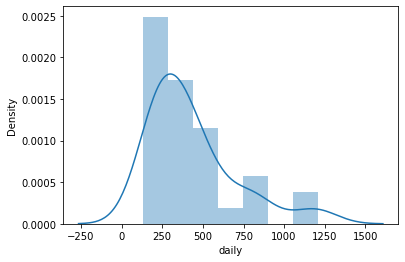

In [4]:
import seaborn as sns
sns.distplot(data['daily'])

/home/aladdin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

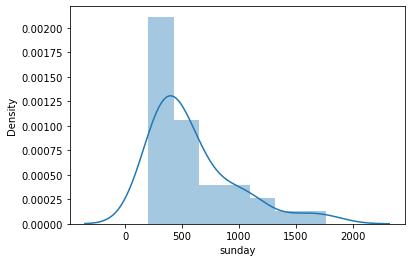

In [5]:
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [16]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

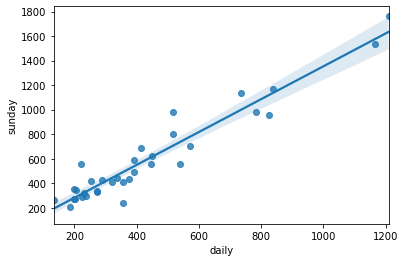

In [17]:
sns.regplot(x="daily", y="sunday", data=data);

In [18]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [19]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [20]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# Predict for new data point

In [21]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([272.28])

In [22]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [23]:
model.predict(data_pred)

0    378.613164
dtype: float64

In [24]:
1.33*272.28 + 13.83

375.96239999999995

## Manual Calculation of RMSE

In [26]:
wc_at = pd.read_csv("Session24_data/WC_AT.csv")

In [27]:
wc_at

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [28]:
wc_at.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [29]:
model2 = smf.ols("Waist~AT", data = wc_at).fit()

In [30]:
model2.params

Intercept    72.163315
AT            0.193716
dtype: float64

In [31]:
print(model2.tvalues)
print(model2.pvalues)

Intercept    47.025363
AT           14.740376
dtype: float64
Intercept    2.697170e-73
AT           1.618607e-27
dtype: float64


In [32]:
print(model2.rsquared)

print(model2.rsquared_adj)

0.6700368930528429
0.6669531256981966


In [33]:
(model2.rsquared, model2.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

In [34]:
data_series = list(wc_at["Waist"])

In [35]:
data_series

[74.75,
 72.6,
 81.8,
 83.95,
 74.65,
 71.85,
 80.9,
 83.4,
 63.5,
 73.2,
 71.9,
 75.0,
 73.1,
 79.0,
 77.0,
 68.85,
 75.95,
 74.15,
 73.8,
 75.9,
 76.85,
 80.9,
 79.9,
 89.2,
 82.0,
 92.0,
 86.6,
 80.5,
 86.0,
 82.5,
 83.5,
 88.1,
 90.8,
 89.4,
 102.0,
 94.5,
 91.0,
 103.0,
 80.0,
 79.0,
 83.5,
 76.0,
 80.5,
 86.5,
 83.0,
 107.1,
 94.3,
 94.5,
 79.7,
 79.3,
 89.8,
 83.8,
 85.2,
 75.5,
 78.4,
 78.6,
 87.8,
 86.3,
 85.5,
 83.7,
 77.6,
 84.9,
 79.8,
 108.3,
 119.6,
 119.9,
 96.5,
 105.5,
 105.0,
 107.0,
 107.0,
 101.0,
 97.0,
 100.0,
 108.0,
 100.0,
 103.0,
 104.0,
 106.0,
 109.0,
 103.5,
 110.0,
 110.0,
 112.0,
 108.5,
 104.0,
 111.0,
 108.5,
 121.0,
 109.0,
 97.5,
 105.5,
 98.0,
 94.5,
 97.0,
 105.0,
 106.0,
 99.0,
 91.0,
 102.5,
 106.0,
 109.1,
 115.0,
 101.0,
 100.1,
 93.3,
 101.8,
 107.9,
 108.5]

In [36]:
data_pred2=pd.DataFrame(data_series,columns=["AT"])

In [ ]:
predicted_data = model2.predict(data_series)

In [62]:
predicted_data

0    85.723445
1    87.660607
dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error as mse

In [82]:
mse(waist_data, predicted_data)

ValueError: Found input variables with inconsistent numbers of samples: [109, 2]

In [69]:
import math
math.sqrt(152.955)

12.367497725894273

In [5]:
import pandas as pd
data = pd.read_csv("Session24_data/NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [3]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/home/aladdin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

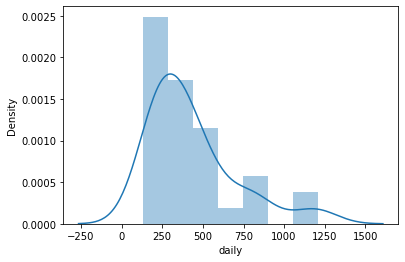

In [4]:
sns.distplot(data['daily'])

<AxesSubplot:xlabel='sunday'>

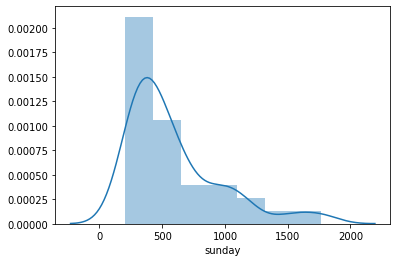

In [58]:
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [40]:
model = smf.ols("sunday~daily",data = data).fit()

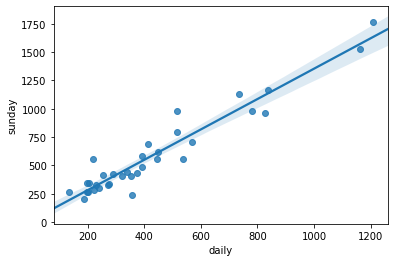

In [59]:
sns.regplot(x="daily", y="sunday", data=data);

In [5]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [34]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
   Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [43]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# Predict for new data point

In [48]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [49]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [50]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64